In [2]:
import pandas as pd

data = pd.read_csv("Datasets/praca_hausing.csv")
data

,pietro,izby,powierzchnia,zadrzewienie,autostrada,przemysł,centrum,jezioro,lasy,tramwaj,policja,szkola,cena,zainter
0,0,4,65.10,13.44,3153.81100,63.63961,7366.52600,1384.37700,538.56290,472.70500,2996.06800,1324.84000,4531.49,False
1,3,2,32.70,21.56,8452.07227,134.35030,2818.24414,1601.85046,1471.20703,96.04687,1860.02686,289.87067,1972.32,True
2,0,3,40.98,1.20,6571.53900,89.44272,2269.05800,1264.80200,798.82730,40.31129,734.20030,261.72500,2037.58,True
3,3,2,49.53,0.48,11763.63574,207.00241,5615.26953,5416.94092,236.48466,2214.45825,2338.56787,182.48288,5471.43,False
4,4,3,81.40,21.72,4384.95500,169.18920,2375.39500,3475.80900,2024.84600,317.56890,1301.76800,65.00000,3482.80,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,25.10,5.20,4261.23535,95.52486,2011.49817,2911.67041,1944.27368,137.93114,483.73547,83.81527,5856.57,False
996,1,5,118.70,5.04,6369.22700,60.20797,2195.38200,1453.61600,1001.69900,221.35940,533.12760,250.00000,3454.09,True
997,0,3,43.70,29.64,4216.83500,261.96380,2307.27700,1879.92700,1155.87600,234.20080,1420.95900,219.14610,4736.84,False
998,3,2,45.70,9.24,4425.45459,61.84658,2693.58496,3260.13794,1907.06580,15.81139,850.00000,435.48822,5689.28,False


In [3]:
# określenie zależności liniowych pomiędzy zmiennymi wyjaśniającymi (niezależnymi) a wyjaśnianymi (zależnymi)

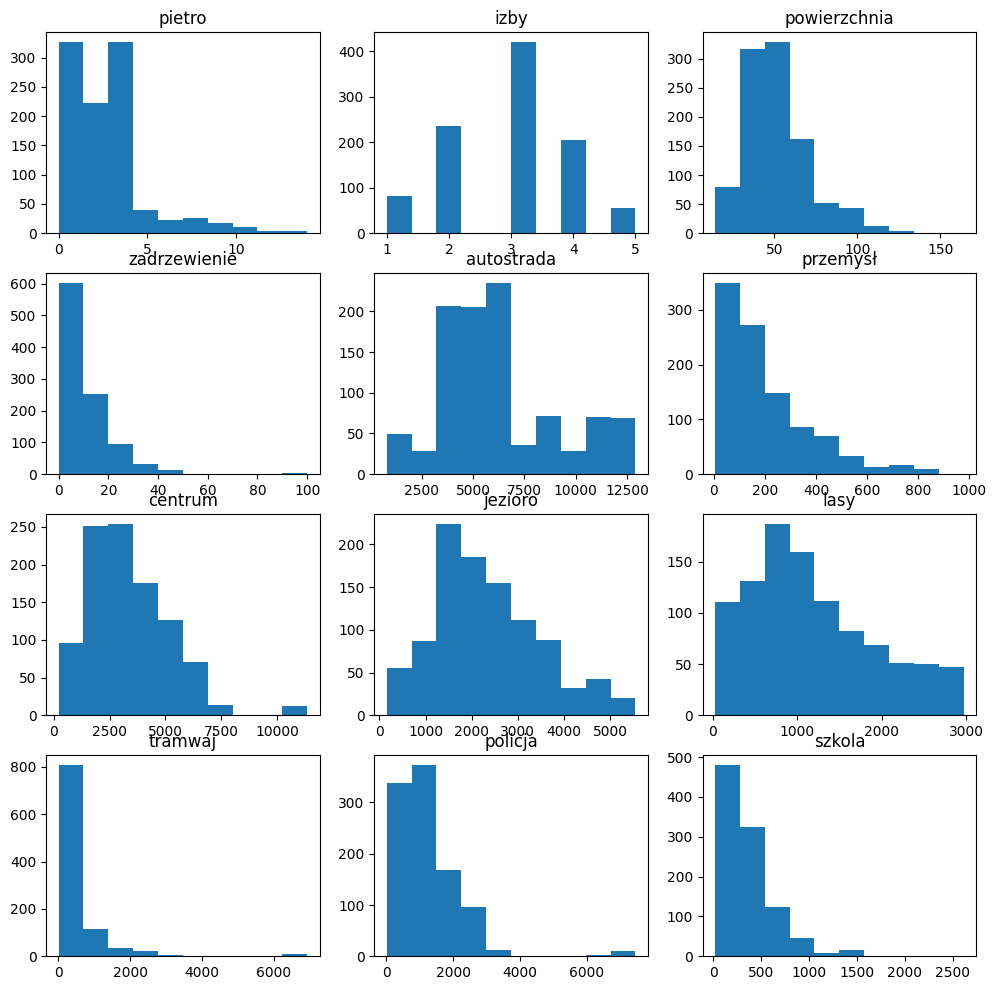

In [6]:
fig,axes = plt.subplots(4,3,figsize=(12,12))
for column, ax in zip(data.columns[:-1],axes.flatten()):
    ax.hist(data[column])
    ax.set_title(column)

In [8]:
from sklearn.linear_model import LinearRegression as ls
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import LinearGAM, s, f
from sklearn.preprocessing import PowerTransformer, StandardScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [41]:
# model_o - ordinary least squares
from sklearn.linear_model import LinearRegression as ls
X = data.iloc[:,:-2]
y = data.iloc[:,-2]
model_o = ls().fit(X,y)
yhat = model_o.predict(X)
mape_o = mean_absolute_percentage_error(y,yhat)
print(mape_o)

0.22990065197992982


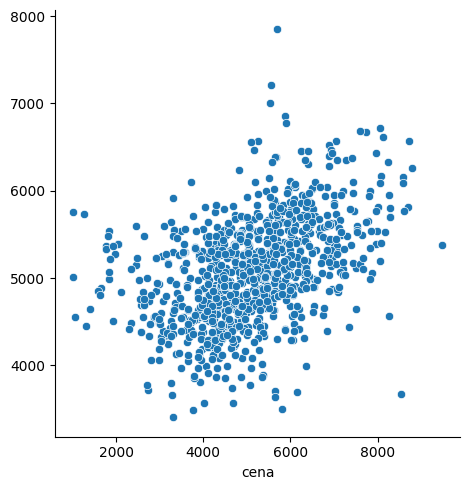

In [42]:
sns.relplot(x=y,y=yhat)

In [40]:
# skalowanie zmiennych
scaler = StandardScaler().fit(data)
scaled = scaler.transform(data)
X = scaled[:,:-2]
y = scaled[:,-2]
model_s = ls().fit(X,y)
yhat = model_s.predict(X)
mape_s = mean_absolute_percentage_error(y,yhat)
print(mape_s)

2.0167656034134818


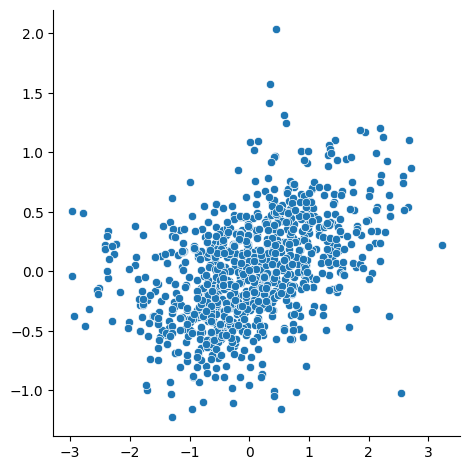

In [26]:
sns.relplot(x=y,y=yhat)

In [27]:
# transformacja potęgowa
transformer_p = PowerTransformer().fit(data)
transformed = transformer_p.transform(data)
X = transformed[:,:-2]
y = transformed[:,-2]
model_p = ls().fit(X,y)
yhat = model_p.predict(X)
mape_p = mean_absolute_percentage_error(y,yhat)
print(mape_p)

2.5603643598629278


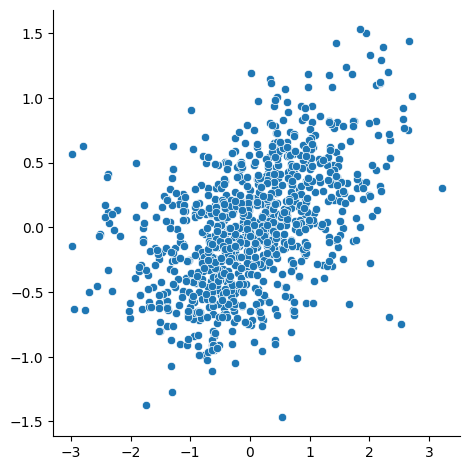

In [28]:
sns.relplot(x=y,y=yhat)

In [33]:
transformer_q = QuantileTransformer().fit(data)
transformed = transformer_q.transform(data)
X = transformed[:,:-2]
y = transformed[:,-2]
model_q = ls().fit(X,y)
yhat = model_q.predict(X)
mae_q = mean_absolute_error(y,yhat)
print(mae_q)

0.20607738522077096


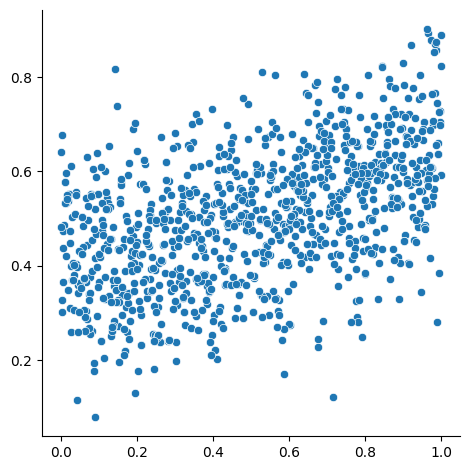

In [34]:
sns.relplot(x=y,y=yhat)

In [36]:
coefs = pd.DataFrame((model_o.coef_,model_s.coef_,model_p.coef_,model_q.coef_),columns=data.columns[:-2])
coefs = coefs.T
coefs.columns=["Ord","scaled","GLS-YJ", "GLS-Q"]
coefs

,Ord,scaled,GLS-YJ,GLS-Q
pietro,-29.312115,-0.047814,-0.028141,-0.036650
izby,-187.251246,-0.136383,-0.096654,-0.103418
powierzchnia,-9.762576,-0.141210,-0.188208,-0.213436
zadrzewienie,-14.176849,-0.116925,-0.157391,-0.186083
autostrada,0.069186,0.141327,0.070172,0.083430
przemysł,1.039137,0.130839,0.186727,0.186273
centrum,-0.003658,-0.004837,-0.078649,0.093465
jezioro,-0.157398,-0.131396,-0.115366,-0.137458
lasy,0.072115,0.039111,0.020551,0.140957
tramwaj,0.019204,0.012231,0.145458,0.090324


In [9]:
# model_o - ordinary least squares
from sklearn.linear_model import LinearRegression as ls
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
model_o_ = ls().fit(X,y)
yhat = model_o_.predict(X)
mape_o = mean_absolute_percentage_error(y,yhat)
print(mape_o)

692388806576408.8


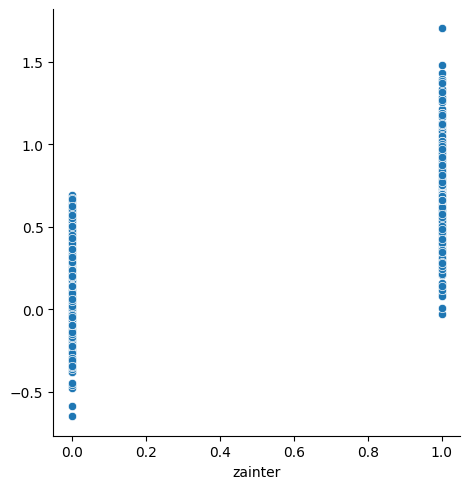

In [10]:
sns.relplot(x=y,y=yhat)

In [12]:
# skalowanie zmiennych
scaler = StandardScaler().fit(data)
scaled = scaler.transform(data)
X = scaled[:,:-1]
y = scaled[:,-1]
model_s_ = ls().fit(X,y)
yhat = model_s_.predict(X)
mape_s = mean_absolute_percentage_error(y,yhat)
print(mape_s)

0.6243204940074892


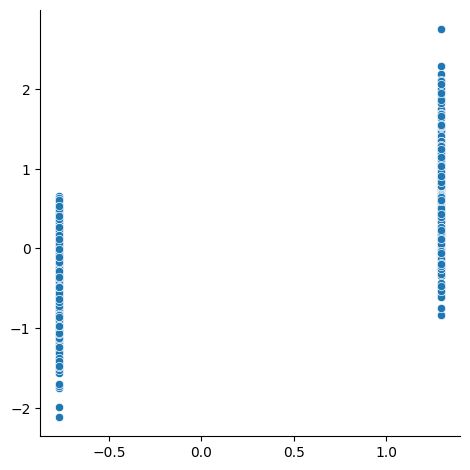

In [13]:
sns.relplot(x=y,y=yhat)

In [14]:
# transformacja potęgowa
transformer_p = PowerTransformer().fit(data)
transformed = transformer_p.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_p_ = ls().fit(X,y)
yhat = model_p_.predict(X)
mape_p = mean_absolute_percentage_error(y,yhat)
print(mape_p)

0.6351021178888117


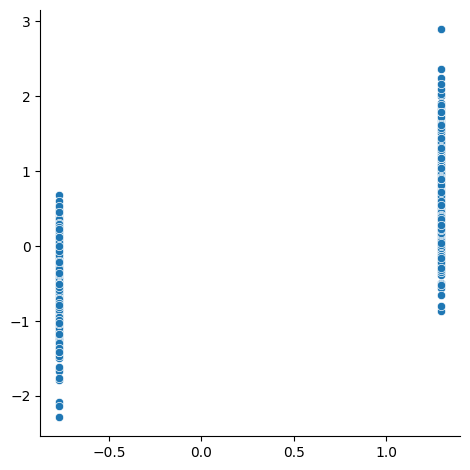

In [15]:
sns.relplot(x=y,y=yhat)

In [16]:
transformer_q = QuantileTransformer().fit(data)
transformed = transformer_q.transform(data)
X = transformed[:,:-1]
y = transformed[:,-1]
model_q_ = ls().fit(X,y)
yhat = model_q_.predict(X)
mae_q = mean_absolute_error(y,yhat)
print(mae_q)

0.2716756557921283


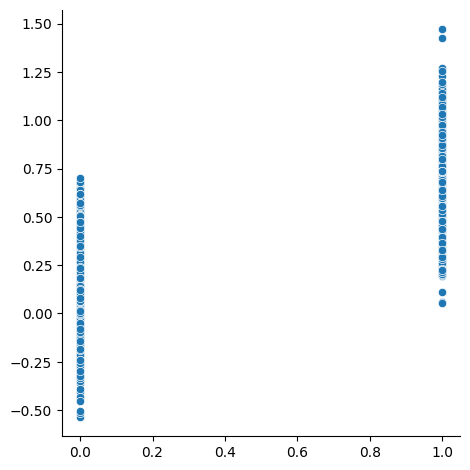

In [17]:
sns.relplot(x=y,y=yhat)

In [19]:
coefs = pd.DataFrame((model_o_.coef_,model_s_.coef_,model_p_.coef_,model_q_.coef_),columns=data.columns[:-1])
coefs = coefs.T
coefs.columns=["Ord","scaled","GLS-YJ", "GLS-Q"]
coefs

,Ord,scaled,GLS-YJ,GLS-Q
pietro,0.014030,0.064567,0.064645,0.077907
izby,-0.267640,-0.549964,-0.489285,-0.760955
powierzchnia,0.005841,0.238344,0.151184,0.139685
zadrzewienie,-0.003904,-0.090834,-0.075465,-0.152997
autostrada,0.000015,0.084548,0.091457,0.180028
przemysł,0.000147,0.052085,0.035907,0.062611
centrum,0.000006,0.021908,-0.021809,0.000714
jezioro,-0.000060,-0.140880,-0.103871,-0.171985
lasy,0.000023,0.034808,0.026948,0.088413
tramwaj,0.000042,0.075014,0.013518,0.039869


In [4]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-2]
y = data.iloc[:,-2]
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
# zmienne o małej przydatności dla modelu liniowego
from sklearn.ensemble import RandomForestRegressor as RF
import numpy as np

estimator = RF().fit(X_train,y_train) # jak było trenowane drzewo
est_std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0)
pd.DataFrame(estimator.feature_importances_,index=X.columns)

,0
pietro,0.058422
izby,0.023502
powierzchnia,0.162581
zadrzewienie,0.087556
autostrada,0.090496
przemysł,0.079856
centrum,0.070834
jezioro,0.113134
lasy,0.077599
tramwaj,0.073343


In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay, permutation_importance, DecisionBoundaryDisplay

trained = permutation_importance(estimator, X_train, y_train, n_repeats=30,random_state=0)
tested = permutation_importance(estimator, X_test, y_test, n_repeats=30,random_state=0)
pd.DataFrame(zip(trained['importances_mean'],tested['importances_mean']),index=X.columns,columns=["train","test"])

,train,test
pietro,0.064313,0.010446
izby,0.039881,0.011974
powierzchnia,0.340884,0.105318
zadrzewienie,0.191298,0.039677
autostrada,0.148017,0.036455
przemysł,0.144005,0.046887
centrum,0.063925,0.006078
jezioro,0.116045,0.068255
lasy,0.066509,0.007413
tramwaj,0.105799,0.036303


Text(0.5, 1.0, 'Testing set')

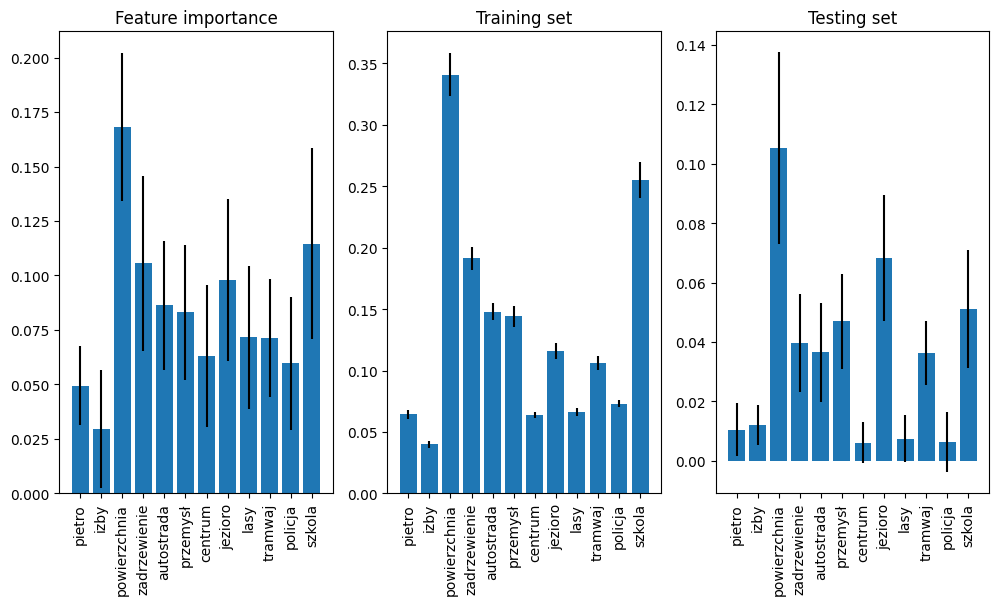

In [68]:
fig,axes = plt.subplots(ncols=3,figsize=(12,6))
axes[0].bar(X.columns,estimator.feature_importances_,yerr=est_std)
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_title("Feature importance")

axes[1].bar(X.columns,trained.importances_mean,yerr=trained.importances_std)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_title("Training set")

axes[2].bar(X.columns,tested.importances_mean,yerr=tested.importances_std)
axes[2].tick_params(axis='x', labelrotation=90)
axes[2].set_title("Testing set")

In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [21]:
# zmienne o małej przydatności dla modelu liniowego
from sklearn.ensemble import RandomForestRegressor as RF

estimator = RF().fit(X_train,y_train) # jak było trenowane drzewo
est_std = np.std([tree.feature_importances_ for tree in estimator.estimators_], axis=0)
pd.DataFrame(estimator.feature_importances_,index=X.columns)

,0
pietro,0.005365
izby,0.231398
powierzchnia,0.028786
zadrzewienie,0.013114
autostrada,0.063412
przemysł,0.014350
centrum,0.012466
jezioro,0.018190
lasy,0.012939
tramwaj,0.008945


In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay, permutation_importance, DecisionBoundaryDisplay

trained = permutation_importance(estimator, X_train, y_train, n_repeats=30,random_state=0)
tested = permutation_importance(estimator, X_test, y_test, n_repeats=30,random_state=0)
pd.DataFrame(zip(trained['importances_mean'],tested['importances_mean']),index=X.columns,columns=["train","test"])

,train,test
pietro,0.003485,0.000577
izby,0.466708,0.635686
powierzchnia,0.033604,0.019748
zadrzewienie,0.012608,0.007039
autostrada,0.095377,0.060244
przemysł,0.012907,0.020026
centrum,0.014923,0.003354
jezioro,0.015768,0.005409
lasy,0.011851,0.004180
tramwaj,0.006605,-0.000561


Text(0.5, 1.0, 'Testing set')

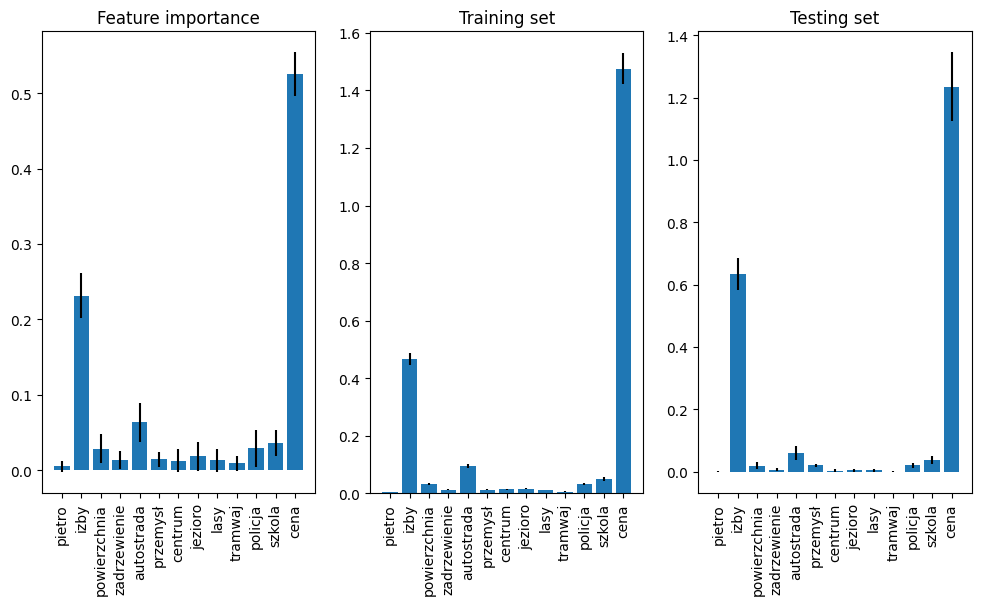

In [24]:
fig,axes = plt.subplots(ncols=3,figsize=(12,6))
axes[0].bar(X.columns,estimator.feature_importances_,yerr=est_std)
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_title("Feature importance")

axes[1].bar(X.columns,trained.importances_mean,yerr=trained.importances_std)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_title("Training set")

axes[2].bar(X.columns,tested.importances_mean,yerr=tested.importances_std)
axes[2].tick_params(axis='x', labelrotation=90)
axes[2].set_title("Testing set")

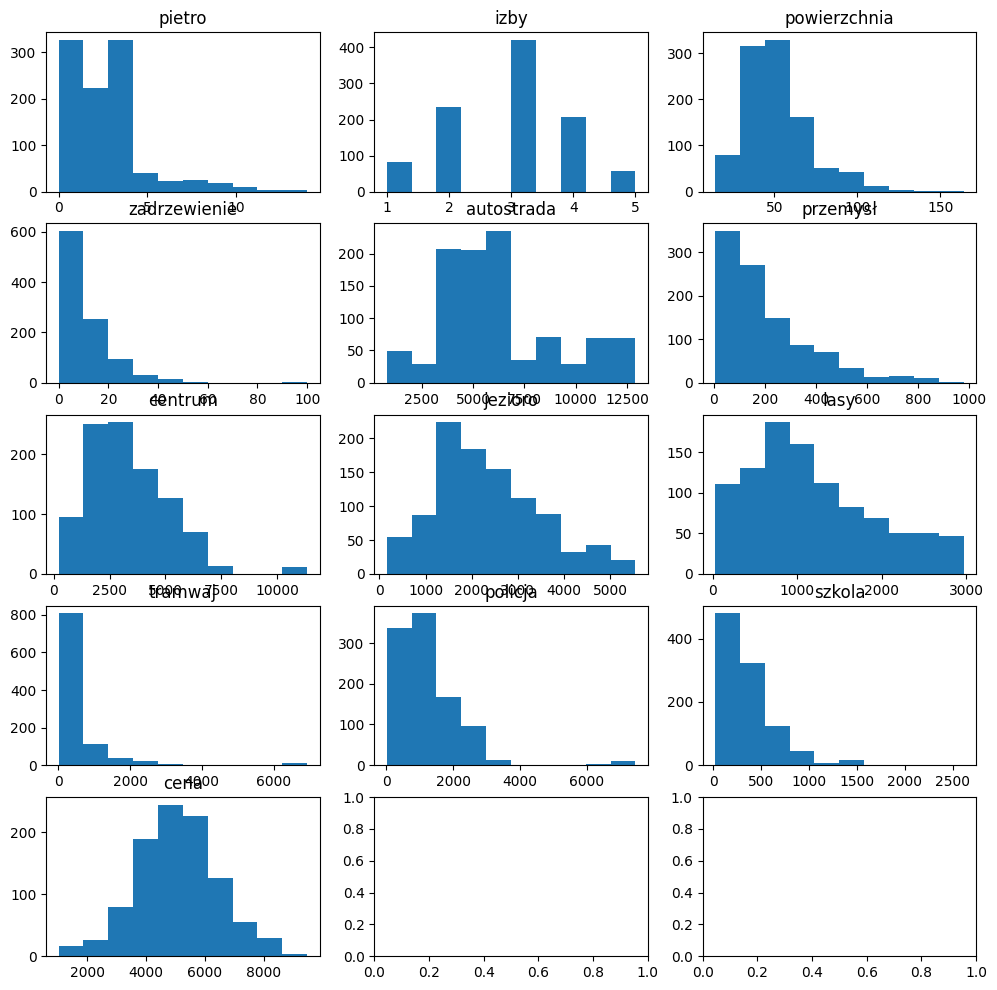

In [48]:
# które zmienne zachowują się nieliniowo
# czy zmiany te są uzasadnione rozkładem tych zmiennych
fig,axes = plt.subplots(5,3,figsize=(12,12))
for column, ax in zip(data.columns[:-1],axes.flatten()):
    ax.hist(data[column])
    ax.set_title(column)

In [41]:
# jaka część zakresu zmiennych wpływa na zwyżkę ceny / zwiększa prawdpodobieństwo zainteresowania
# jaka część zakresu zmiennych wpływa na obiżkę ceny / zmniejsza prawdpodobieństwo zainteresowania
X = data.iloc[:,:-2]
y = data.iloc[:,-2]

gam = LinearGAM(s(0,n_splines=10) + s(1,n_splines=10) + s(2,n_splines=5) + s(3,n_splines=5) + s(4,n_splines=5) + s(5,n_splines=4) + s(6,n_splines=10) + s(7,n_splines=10) +  s(8,n_splines=10) + s(9,n_splines=10) + s(10,n_splines=10)+ s(11,n_splines=10), fit_intercept=True)
# gam = LinearGAM()
gam.fit(X, y)
gam.summary()

lams = np.random.rand(100,12) # random points on [0, 1], with shape (100, 8)
lams = lams * 4 - 2 # shift values to -10, 10
lams = 10 ** lams # transforms values to 1e-2, 1e2

gam = gam.gridsearch(X.values,y,lam=lams)
gam.summary()

C:\Users\MaurycyOprus\AppData\Local\Temp\ipykernel_20284\474613195.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
  1% (1 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:11

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.5141
Link Function:                     IdentityLink Log Likelihood:                                -15002.0388
Number of Samples:                         1000 AIC:                                            30095.1057
                                                AICc:                                           30099.5463
                                                GCV:                                          1420127.2845
                                                Scale:                                        1306810.3802
                                                Pseudo R-Squared:                                   0.3285
Feature Function                  Lam

100% (100 of 100) |######################| Elapsed Time: 0:00:11 Time:  0:00:11


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     41.6996
Link Function:                     IdentityLink Log Likelihood:                                -14979.8491
Number of Samples:                         1000 AIC:                                            30045.0975
                                                AICc:                                           30048.9999
                                                GCV:                                           1381419.223
                                                Scale:                                         1278131.961
                                                Pseudo R-Squared:                                   0.3413
Feature Function                  Lam

C:\Users\MaurycyOprus\AppData\Local\Temp\ipykernel_20284\474613195.py:16: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


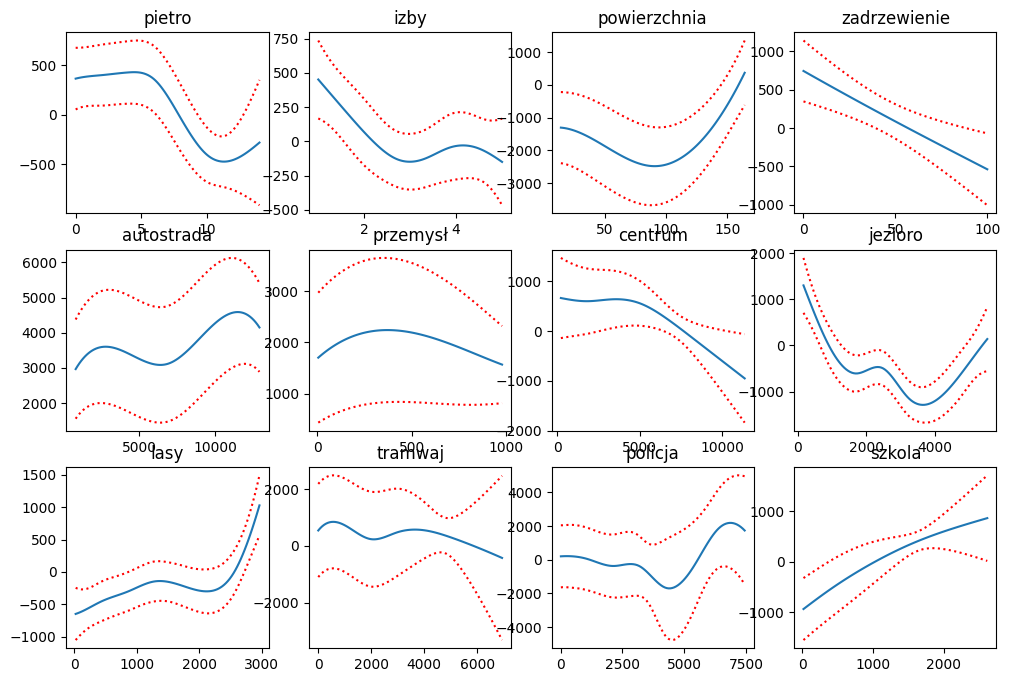

In [42]:
fig, axes = plt.subplots(3,4,figsize=(12,8))
for t, ax in zip(range(12),axes.flatten()):
    XX = gam.generate_X_grid(term=t)
    pdp, confi = gam.partial_dependence(term=t, X=XX, width=0.95)
    ax.plot(XX.T[t],pdp)
    ax.plot(XX.T[t],confi,c="r",ls=":")
    ax.set_title(X.columns[t])

In [43]:
# dla zmiennej zależnej binarnej (zainteresowanie)
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, LogisticGAM, s, f, l
from sklearn.multiclass import OneVsRestClassifier
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

LE = LabelEncoder().fit(y) 
y = LE.transform(y)
LE.classes_
gam = LogisticGAM().fit(X,y)
yhat = gam.predict(X)
gam.accuracy(X,y)
proba = gam.predict_proba(X)

C:\Users\MaurycyOprus\AppData\Local\Programs\Python\Python310\lib\site-packages\pygam\links.py:151: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
C:\Users\MaurycyOprus\AppData\Local\Programs\Python\Python310\lib\site-packages\pygam\pygam.py:629: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


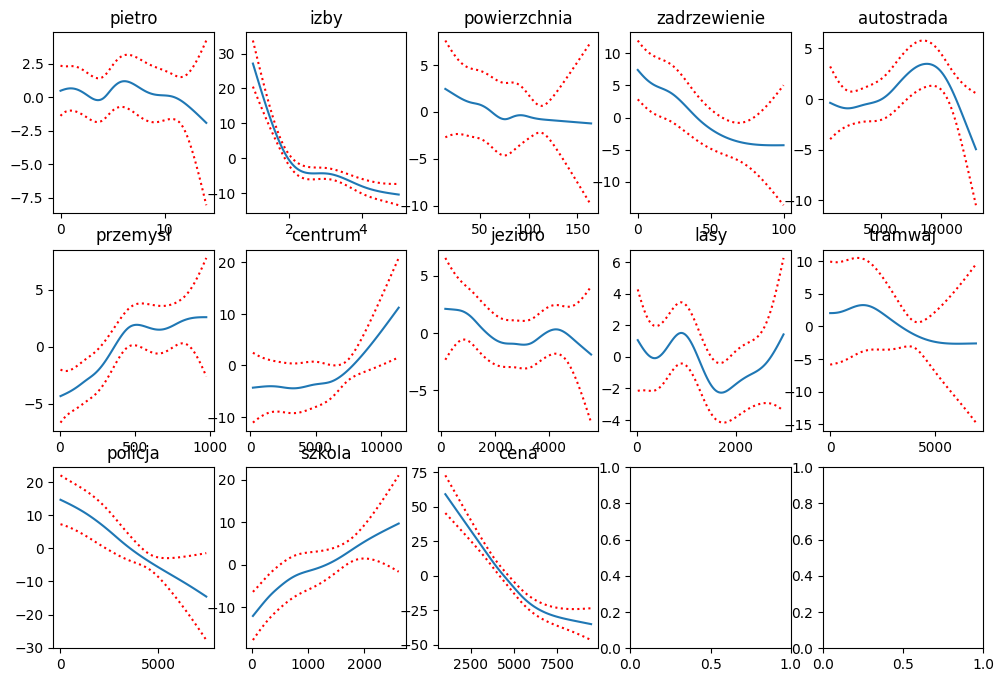

In [44]:
fig, axes = plt.subplots(3,5,figsize=(12,8))
for term, ax in zip(range(13),axes.flatten()):
    XX = gam.generate_X_grid(term=term)
    pdp, confi = gam.partial_dependence(term=term, X=XX, width=0.95)
    ax.plot(XX.T[term],pdp)
    ax.plot(XX.T[term],confi,c="r",ls=":")
    ax.set_title(X.columns[term])